In [34]:
import numpy as np
import pandas as pd
import csv
import ast
import matplotlib.pyplot as plt
from tqdm import tqdm

## Leitura do arquivo com dados de treino

In [35]:
df = pd.read_csv('featuresTrain.csv')

In [36]:
X = df
X = X.values

## Leitura do arquivo com os rótulos

In [37]:
df = pd.read_csv('labelsTrain.csv')

In [38]:
y = df
y = y['0']

In [39]:
from sklearn.model_selection import train_test_split

## Fazer split dos dados com 70% para treino e 30% só para testes

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [85]:
X_train.shape

(3404, 51)

In [86]:
y_train

4214    1.0
2892    1.0
2476    1.0
3065    1.0
4160    1.0
       ... 
4426    1.0
466     0.0
3092    1.0
3772    1.0
860     0.0
Name: 0, Length: 3404, dtype: float64

In [87]:
X_test

array([[2.186e+03, 4.000e+00, 8.000e+00, ..., 1.100e+01, 5.000e+00,
        8.000e+00],
       [3.353e+03, 8.000e+00, 3.000e+00, ..., 6.000e+00, 2.000e+00,
        6.000e+00],
       [2.651e+03, 1.200e+01, 3.000e+00, ..., 4.000e+00, 3.000e+00,
        8.000e+00],
       ...,
       [1.743e+03, 3.000e+00, 6.000e+00, ..., 5.000e+00, 3.000e+00,
        1.000e+01],
       [2.436e+03, 7.000e+00, 5.000e+00, ..., 2.000e+00, 4.000e+00,
        8.000e+00],
       [2.229e+03, 7.000e+00, 1.700e+01, ..., 8.000e+00, 3.000e+00,
        5.000e+00]])

In [88]:
y_test

2186    0.0
3353    1.0
2651    1.0
2104    0.0
4492    1.0
       ... 
498     0.0
4229    1.0
1743    0.0
2436    1.0
2229    0.0
Name: 0, Length: 1460, dtype: float64

In [45]:
from sklearn.model_selection import KFold

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score # revocacao
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import confusion_matrix, classification_report # matriz de confusão 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

## Definição do treino para um algoritmo de SVM. 

* K-fold = 5, stratified (), sendo este objeto de validação cruzada é uma variação do KFold que retorna folds estratificados. s folds são feitos preservando a porcentagem de amostras para cada classe.
* Algoritmo SVM, sendo SVC()
* Divisão dos arquivos de treino/validação pelo k-fold
* Predição dos dados
* Cálculo de métricas estatísticas. Há várias métricas, comum é: acurácia, precisão e recall.
* 10 execuções de treino.


In [106]:
execucoes = []
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
k = 1
i = 0
for i in range(10):
    k = 1
    for indices_treino, indices_teste in kf.split(X_train, y_train):
        k+=1
        clf = SVC()
        X_Ttrain, X_Ttest = X[indices_treino], X[indices_teste]
        y_Ttrain, y_Ttest = y[indices_treino], y[indices_teste]
        clf.fit(X_Ttrain, y_Ttrain)
        predicao_treino = clf.predict(X_Ttest)
    # métricas de validacao
        precision = precision_score(y_Ttest,predicao_treino, average='binary', zero_division=0)*100 # Calculando a precisao
        revocacao =recall_score(y_Ttest, predicao_treino, average='binary', zero_division=0)*100 # Calcula a revocacao
        acc = accuracy_score(y_Ttest, predicao_treino)*100   # acuracia
        cm = confusion_matrix(y_Ttest, predicao_treino)
    
        execucoes.append({
                        'Kfold':k,
                        'acuracia':acc,
                        'precisao':precision,
                        'revocacao':revocacao,
                        'cm': cm
                        })

In [107]:
df = pd.DataFrame(execucoes)

In [108]:
df

,Kfold,acuracia,precisao,revocacao,cm
0,2,100.000000,0.000000,0.0,[[681]]
1,3,100.000000,0.000000,0.0,[[681]]
2,4,100.000000,0.000000,0.0,[[681]]
3,5,95.007342,89.570552,100.0,"[[355, 34], [0, 292]]"
4,6,100.000000,100.000000,100.0,[[680]]
5,2,100.000000,0.000000,0.0,[[681]]
6,3,100.000000,0.000000,0.0,[[681]]
7,4,100.000000,0.000000,0.0,[[681]]
8,5,95.007342,89.570552,100.0,"[[355, 34], [0, 292]]"
9,6,100.000000,100.000000,100.0,[[680]]


In [109]:
df[['acuracia', 'precisao', 'revocacao']].loc[df['Kfold']==5]

,acuracia,precisao,revocacao
3,95.007342,89.570552,100.0
8,95.007342,89.570552,100.0
13,95.007342,89.570552,100.0
18,95.007342,89.570552,100.0
23,95.007342,89.570552,100.0
28,95.007342,89.570552,100.0
33,95.007342,89.570552,100.0
38,95.007342,89.570552,100.0
43,95.007342,89.570552,100.0
48,95.007342,89.570552,100.0


## Podemos criar modelos auxiliares de treino, bem como um df somente com os nomes dos modelos de algoritmos. 

In [47]:
## class suport
## Class axiliar para ajudar no modelos de machine learn
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [48]:
modelos = [{'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
            {'nome': 'Knn',
             'modelo':KNeighborsClassifier},
             {'nome': 'Rfrorest',
             'modelo':RandomForestClassifier},
             {'nome':'SGDClassifier', 'modelo':SGDClassifier}, 
             {'nome':'SVC', 'modelo':SVC},
            {'nome':'LinearSVC', 'modelo':LinearSVC}]

In [121]:
execucoes = []
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
k = 1
i = 0
for model in tqdm(modelos):
    for i in range(10):
        k = 1
        clf = ModeloAuxiliar(clf=model['modelo'])
        for indices_treino, indices_teste in kf.split(X_train, y_train):
            k+=1 
            X_Ttrain, X_Ttest = X[indices_treino], X[indices_teste]
            y_Ttrain, y_Ttest = y[indices_treino], y[indices_teste]
            clf.fit(X_Ttrain, y_Ttrain)
            predicao_treino = clf.predict(X_Ttest)
            precisao_teste = clf.predict(X_test)
    # métricas de validacao
            precision_treino = precision_score(y_Ttest,predicao_treino, average='binary', zero_division=0)*100 # Calculando a precisao
            revocacao_treino =recall_score(y_Ttest, predicao_treino, average='binary', zero_division=0)*100 # Calcula a revocacao
            acc_treino = accuracy_score(y_Ttest, predicao_treino)*100   # acuracia
            
            precision_teste = precision_score(y_test,precisao_teste, average='binary', zero_division=0)*100 # Calculando a precisao
            revocacao_teste =recall_score(y_test, precisao_teste, average='binary', zero_division=0)*100 # Calcula a revocacao
            acc_teste = accuracy_score(y_test, precisao_teste)*100   # acuracia
            cm_teste = confusion_matrix(y_test, precisao_teste)
    
            execucoes.append({
                        'Kfold':k,
                        'nome': model['nome'],
                        'acuracia_treino':acc_treino,
                        'precisao_treino':precision_treino,
                        'revocacao_treino':revocacao_treino,
                        'acuracia_teste':acc_teste,
                        'precisao_teste':precision_teste,
                        'revocacao_teste':revocacao_teste,
                        'cm': cm_teste
                        })

 83%|█████████████████████████████████████▌       | 5/6 [00:33<00:06,  6.55s/it]/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabi

/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|█████████████████████████████████████████████| 6/6 [00:48<00:00,  8.03s/it]


In [122]:
df = pd.DataFrame(execucoes)


In [ ]:
df.to_csv("ResultSIFTK5.csv")

In [157]:
df[['nome','acuracia_teste', 'precisao_teste', 'revocacao_teste', 'cm']].loc[df['Kfold']==5]

,nome,acuracia_teste,precisao_teste,revocacao_teste,cm
3,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
8,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
13,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
18,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
23,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
28,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
33,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
38,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
43,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"
48,Dtree,99.246575,98.446328,100.000000,"[[752, 11], [0, 697]]"


In [161]:
df[['acuracia_teste', 'precisao_teste', 'revocacao_teste', 'cm']].loc[(df['Kfold']==5) & (df['nome']=='Dtree')]

,acuracia_teste,precisao_teste,revocacao_teste,cm
3,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
8,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
13,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
18,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
23,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
28,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
33,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
38,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
43,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"
48,99.246575,98.446328,100.0,"[[752, 11], [0, 697]]"


In [133]:
df[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df['Kfold']==5) & (df['nome']=='Knn')].mean()

acuracia_teste      99.246575
precisao_teste      98.446328
revocacao_teste    100.000000
dtype: float64

In [134]:
df[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df['Kfold']==5) & (df['nome']=='Rfrorest')].mean()

acuracia_teste      99.164384
precisao_teste      98.279822
revocacao_teste    100.000000
dtype: float64

In [135]:
df[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df['Kfold']==5) & (df['nome']=='SVC')].mean()

acuracia_teste      99.178082
precisao_teste      98.307475
revocacao_teste    100.000000
dtype: float64

In [136]:
df[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df['Kfold']==5) & (df['nome']=='LinearSVC')].mean()

acuracia_teste     95.506849
precisao_teste     93.382937
revocacao_teste    97.905308
dtype: float64

In [138]:
df[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df['Kfold']==5) & (df['nome']=='SGDClassifier')].mean()

acuracia_teste     92.801370
precisao_teste     88.862497
revocacao_teste    98.436155
dtype: float64

## Avaliando com Kfolds=10

In [142]:
execucoes = []
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
k = 0
i = 0
for model in tqdm(modelos):
    for i in range(10):
        k = 1
        clf = ModeloAuxiliar(clf=model['modelo'])
        for indices_treino, indices_teste in kf.split(X_train, y_train):
            k+=1 
            X_Ttrain, X_Ttest = X[indices_treino], X[indices_teste]
            y_Ttrain, y_Ttest = y[indices_treino], y[indices_teste]
            clf.fit(X_Ttrain, y_Ttrain)
            predicao_treino = clf.predict(X_Ttest)
            precisao_teste = clf.predict(X_test)
    # métricas de validacao
            precision_treino = precision_score(y_Ttest,predicao_treino, average='binary', zero_division=0)*100 # Calculando a precisao
            revocacao_treino =recall_score(y_Ttest, predicao_treino, average='binary', zero_division=0)*100 # Calcula a revocacao
            acc_treino = accuracy_score(y_Ttest, predicao_treino)*100   # acuracia
            
            precision_teste = precision_score(y_test,precisao_teste, average='binary', zero_division=0)*100 # Calculando a precisao
            revocacao_teste =recall_score(y_test, precisao_teste, average='binary', zero_division=0)*100 # Calcula a revocacao
            acc_teste = accuracy_score(y_test, precisao_teste)*100   # acuracia
            cm_teste = confusion_matrix(y_test, precisao_teste)
    
            execucoes.append({
                        'Kfold':k,
                        'nome': model['nome'],
                        'acuracia_treino':acc_treino,
                        'precisao_treino':precision_treino,
                        'revocacao_treino':revocacao_treino,
                        'acuracia_teste':acc_teste,
                        'precisao_teste':precision_teste,
                        'revocacao_teste':revocacao_teste,
                        'cm': cm_teste
                        })

 83%|█████████████████████████████████████▌       | 5/6 [01:11<00:13, 13.96s/it]/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabi

/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: Convergenc

/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/fabiosammy/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: Convergenc

In [145]:
df1 = pd.DataFrame(execucoes)
df1

,Kfold,nome,acuracia_treino,precisao_treino,revocacao_treino,acuracia_teste,precisao_teste,revocacao_teste,cm
0,2,Dtree,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,"[[763, 0], [0, 697]]"
1,3,Dtree,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,"[[763, 0], [0, 697]]"
2,4,Dtree,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,"[[763, 0], [0, 697]]"
3,5,Dtree,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,"[[763, 0], [0, 697]]"
4,6,Dtree,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,"[[763, 0], [0, 697]]"
...,...,...,...,...,...,...,...,...,...
595,7,LinearSVC,98.823529,0.000000,0.000000,87.328767,99.805447,73.601148,"[[762, 1], [184, 513]]"
596,8,LinearSVC,75.294118,0.000000,0.000000,96.506849,93.885870,99.139168,"[[718, 45], [6, 691]]"
597,9,LinearSVC,83.235294,94.676806,85.273973,97.123288,97.950220,95.982783,"[[749, 14], [28, 669]]"
598,10,LinearSVC,85.294118,100.000000,85.294118,95.136986,99.369085,90.387374,"[[759, 4], [67, 630]]"


In [150]:
df1[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df1['Kfold']==10) & (df1['nome']=='Dtree')].mean()

acuracia_teste     100.0
precisao_teste     100.0
revocacao_teste    100.0
dtype: float64

In [151]:
df1[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df1['Kfold']==10) & (df1['nome']=='Knn')].mean()

acuracia_teste      99.931507
precisao_teste      99.856734
revocacao_teste    100.000000
dtype: float64

In [152]:
df1[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df1['Kfold']==10) & (df1['nome']=='SVC')].mean()

acuracia_teste     100.0
precisao_teste     100.0
revocacao_teste    100.0
dtype: float64

In [154]:
df1[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df1['Kfold']==10) & (df1['nome']=='Rfrorest')].mean()

acuracia_teste     100.0
precisao_teste     100.0
revocacao_teste    100.0
dtype: float64

In [155]:
df1[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df1['Kfold']==5) & (df1['nome']=='LinearSVC')].mean()

acuracia_teste     94.383562
precisao_teste     96.809591
revocacao_teste    91.549498
dtype: float64

In [156]:
df1[['acuracia_teste', 'precisao_teste', 'revocacao_teste']].loc[(df1['Kfold']==5) & (df1['nome']=='SGDClassifier')].mean()

acuracia_teste     91.589041
precisao_teste     92.824195
revocacao_teste    90.746055
dtype: float64

## Fazendo o teste de posthoc

In [65]:
import scikit_posthocs as sp

In [87]:
x = pd.DataFrame({"DT":[99.24,99.24,99.24,99.24,99.24,99.24,99.24,99.24,99.24,99.24],
"Knn":[99.24,99.24,99.24,99.24,99.24,99.24,99.24,99.24,99.24,99.24],
"RF":[99.10,99.10,99.24,99.17,99.17,99.17,99.17,99.17,99.17,99.10],
"SVM":[96.23,95.68,92.87,95.75,80.47,96.09,95.95,96.09,96.76,85.06],
"LinearSVM":[99.17,99.17,99.17,99.17,99.17,99.17,99.17,99.17,99.17,99.17],
"SGD":[89.79,92.39,96.98,96.50,96.43,96.98,96.84,96.09,96.50,96.50]})

In [88]:
x = x.melt(var_name='groups', value_name='vals')
x

,groups,vals
0,DT,99.24
1,DT,99.24
2,DT,99.24
3,DT,99.24
4,DT,99.24
5,DT,99.24
6,DT,99.24
7,DT,99.24
8,DT,99.24
9,DT,99.24


In [91]:
#post = sp.__convert_to_df(x)
pc = sp.posthoc_conover(x, val_col='vals', group_col='groups')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f496a1572e0>)

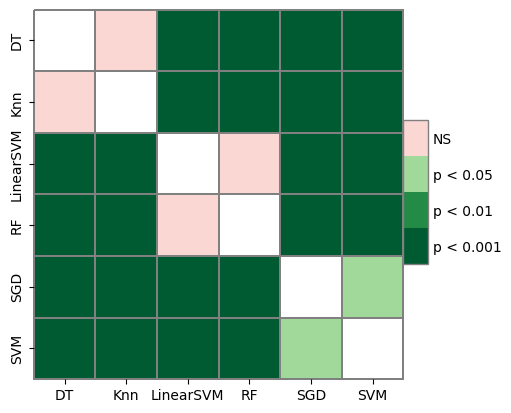

In [92]:
heatmap_args = {'linewidths':0.25, 'linecolor':'0.5', 'clip_on':False, 'square':True, 'cbar_ax_bbox':[0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)